In [118]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [119]:
df=pd.read_csv("period.csv")
df.head()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0
1,4,18,25,17,10,6,yes,5 6,76.0,0,26.3,30,5.0
2,2,19,30,17,13,4,no,5 3,56.0,0,21.9,30,2.0
3,3,19,28,16,14,6,no,5 1,61.0,0,25.4,30,3.0
4,2,19,35,18,15,5,no,5'3,55.0,0,21.5,35,5.0


In [120]:
df.columns

Index(['number_of_peak', 'Age', 'Length_of_cycle',
       'Estimated_day_of_ovulution', 'Length_of_Leutal_Phase',
       'Length_of_menses', 'Unusual_Bleeding', 'Height', 'Weight', 'Income',
       'BMI', 'Mean_of_length_of_cycle', 'Menses_score'],
      dtype='object')

In [121]:
df.groupby('Menses_score').size()

Menses_score
1.0    12
2.0    24
3.0    52
4.0    36
4.2     2
4.5     4
5.0    32
dtype: int64

In [122]:
df[df["Menses_score"]==4.5]=5.0
df[df["Menses_score"]==4.2]=4.0
df["Menses_score"]=df["Menses_score"].astype(int)-1

In [123]:
df.groupby('Menses_score').size()

Menses_score
0    12
1    24
2    52
3    38
4    36
dtype: int64

In [124]:
# df["Unusual_Bleeding"]=df["Unusual_Bleeding"].map({"no":0,"yes":1})

In [125]:
df.drop(["Income", "Height", "Weight", "Unusual_Bleeding"],inplace=True, axis=1)
# df.dropna(inplace=True)
df.reset_index(inplace=True)

In [126]:
x=df.drop(["Menses_score"], axis=1)
train_col=x.columns
y=df["Menses_score"]
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [127]:
df.corr()

,index,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,BMI,Mean_of_length_of_cycle,Menses_score
index,1.000000,-0.003896,-0.008016,0.028220,-0.018271,0.086127,-0.028831,-0.047307,-0.034888,-0.007307
number_of_peak,-0.003896,1.000000,-0.444134,-0.272884,-0.331909,-0.188470,0.122259,-0.401415,-0.162357,0.275449
Age,-0.008016,-0.444134,1.000000,0.638549,0.561223,0.416137,0.011812,0.701263,0.550677,-0.141913
Length_of_cycle,0.028220,-0.272884,0.638549,1.000000,0.640897,0.489020,0.017645,0.482372,0.815558,-0.162654
Estimated_day_of_ovulution,-0.018271,-0.331909,0.561223,0.640897,1.000000,0.452474,-0.010668,0.417443,0.563393,-0.130421
Length_of_Leutal_Phase,0.086127,-0.188470,0.416137,0.489020,0.452474,1.000000,-0.000128,0.234132,0.517204,0.168395
Length_of_menses,-0.028831,0.122259,0.011812,0.017645,-0.010668,-0.000128,1.000000,0.016295,0.192747,0.104645
BMI,-0.047307,-0.401415,0.701263,0.482372,0.417443,0.234132,0.016295,1.000000,0.417672,-0.218411
Mean_of_length_of_cycle,-0.034888,-0.162357,0.550677,0.815558,0.563393,0.517204,0.192747,0.417672,1.000000,-0.039360
Menses_score,-0.007307,0.275449,-0.141913,-0.162654,-0.130421,0.168395,0.104645,-0.218411,-0.039360,1.000000


In [128]:
# sns.pairplot(df)
# plt.show()

In [129]:
df.describe()

,index,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,BMI,Mean_of_length_of_cycle,Menses_score
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,80.500000,2.592593,18.802469,28.419753,14.728395,12.407407,5.061728,21.125309,28.444444,2.382716
std,46.909487,0.815651,3.138302,6.259133,3.072670,3.600475,1.001188,4.395997,7.066674,1.195934
min,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,0.000000
25%,40.250000,2.000000,19.000000,27.000000,14.000000,10.000000,5.000000,20.000000,26.000000,2.000000
50%,80.500000,2.000000,19.000000,28.000000,15.000000,13.000000,5.000000,21.600000,30.000000,2.000000
75%,120.750000,3.000000,20.000000,30.000000,16.000000,14.000000,6.000000,22.500000,30.000000,3.000000
max,161.000000,5.000000,25.000000,40.000000,22.000000,30.000000,8.000000,32.900000,46.000000,4.000000


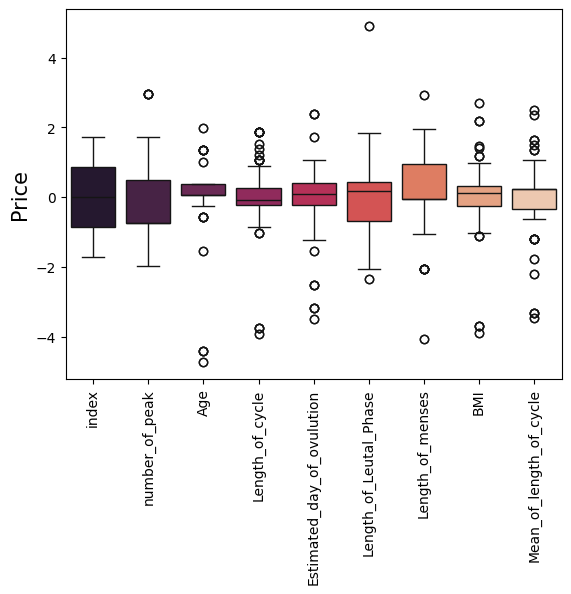

In [130]:
x=pd.DataFrame(x, columns=train_col)
sns.boxplot(data=x, palette="rocket")
plt.ylabel('Price',size=15)
plt.xticks(rotation=90)
plt.show()

In [131]:
def remove_outliers(df):
    outlier_indices = []

    for column in df.columns:
        # Calculate the first and third quartiles
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the indices of outliers in this column
        outliers_in_column = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)].tolist()

        # Append the indices to the list of outlier indices
        outlier_indices.extend(outliers_in_column)

    # Remove duplicate indices
    outlier_indices = list(set(outlier_indices))
    y.drop(index=outlier_indices, inplace=True)
    return df.drop(index=outlier_indices)

# clean_x = remove_outliers(x)
clean_x = x

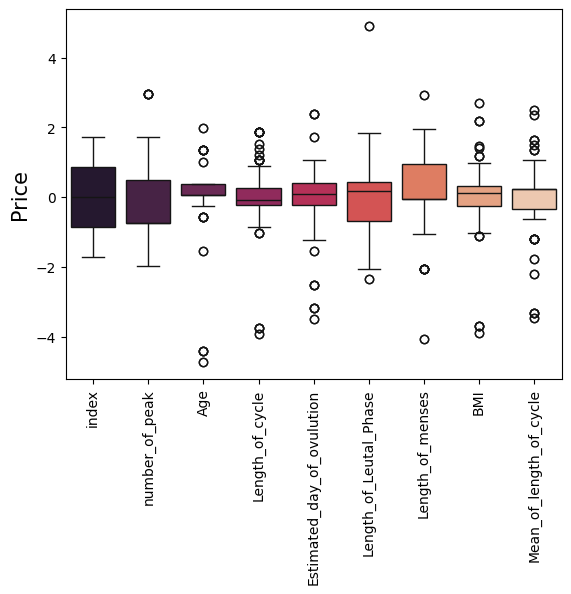

In [132]:
sns.boxplot(data=clean_x, palette="rocket")
plt.ylabel('Price',size=15)
plt.xticks(rotation=90)
plt.show()

In [141]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history=model.fit(clean_x, y, epochs=150, validation_split=0.25)

Epoch 1/150
4/4 [==============================] - 2s 120ms/step - loss: 1.8067 - accuracy: 0.1818 - val_loss: 1.6891 - val_accuracy: 0.3415
Epoch 2/150
4/4 [==============================] - 0s 25ms/step - loss: 1.6527 - accuracy: 0.2727 - val_loss: 1.5805 - val_accuracy: 0.3659
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 1.5700 - accuracy: 0.3223 - val_loss: 1.5177 - val_accuracy: 0.3415
Epoch 4/150
4/4 [==============================] - 0s 25ms/step - loss: 1.5330 - accuracy: 0.3306 - val_loss: 1.4740 - val_accuracy: 0.3415
Epoch 5/150
4/4 [==============================] - 0s 20ms/step - loss: 1.5001 - accuracy: 0.3306 - val_loss: 1.4426 - val_accuracy: 0.3415
Epoch 6/150
4/4 [==============================] - 0s 24ms/step - loss: 1.4762 - accuracy: 0.3471 - val_loss: 1.4176 - val_accuracy: 0.4146
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 1.4568 - accuracy: 0.3471 - val_loss: 1.3938 - val_accuracy: 0.4390
Epoch 8/150
4/4 [==

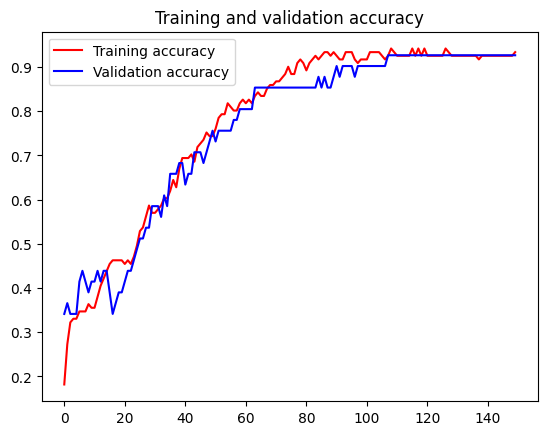

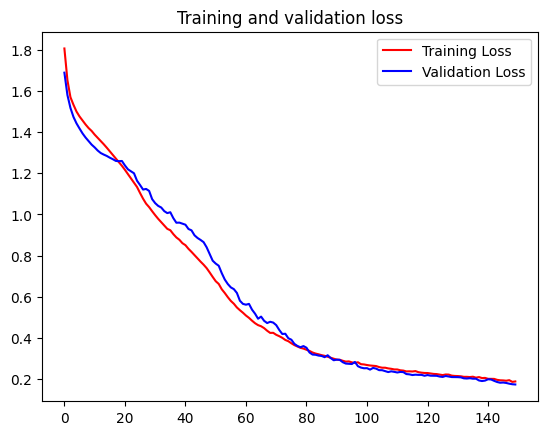

In [142]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [143]:
predictions = model.predict(clean_x)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y.astype(float)
predicted_labels = predicted_labels.astype(float)

confusion_matrix = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)
print(confusion_matrix.numpy())

6/6 [==============================] - 0s 2ms/step
[[12  0  0  0  0]
 [ 0 22  0  0  2]
 [ 0  0 52  0  0]
 [ 2  0  0 32  4]
 [ 0  2  0  0 34]]


In [144]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
